The goal of this notebook is to provide an easy tutorial showcasing the different features of the BioFuzzNet module.

In [1]:
# Imports
# External imports
import torch
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Module imports
import biological_fuzzy_logic_networks.biofuzznet as biofuzznet
import biological_fuzzy_logic_networks.biofuzzdataset as biofuzzdataset
import biological_fuzzy_logic_networks.Hill_function as Hill_function
import biological_fuzzy_logic_networks.utils as utils
import biological_fuzzy_logic_networks.draw as draw
import biological_fuzzy_logic_networks.biomixnet as biomixnet

c:\Users\clegac\Documents\Code\venv\biofuzznet\lib\site-packages\torch\__init__.py:614: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at ..\torch\csrc\tensor\python_tensor.cpp:453.)
  _C._set_default_tensor_type(t)


In [2]:
torch.manual_seed(2)

# Building a BioFuzzNet or a BioMixNet

## From scratch

In [3]:
# Create an empty BioFuzzNet
G_not = biofuzznet.BioFuzzNet(None, None)

# Add nodes
G_not.add_fuzzy_node("A", "BIO")  # A biological node
G_not.add_fuzzy_node("B", "BIO")
G_not.add_fuzzy_node("NOT A", "NOT")  # A logical not gate
# Add edges
G_not.add_transfer_edge("A", "NOT A")  # A transfer edge downstream of a biological node
G_not.add_simple_edge("NOT A", "B")  # A simple edge downstream of a logical node

In [4]:
# Creates a BioFuzzNet from a list of nodes and a list of edges
# If a node has more than 2 incoming edges, it assumes those are integrated via an OR gate
# This is the same network as above

node_list = ["A", "B"]
edge_dic = {("A", "B"): -1}
G_not_from_list = biofuzznet.BioFuzzNet(node_list, edge_dic)

In [5]:
# Draw the networks to compare them
# Color schemes for the drawing
general_edge_color_scheme = {"simple": "b", "transfer_function": "r"}
general_node_shape_scheme = {
    "biological": "s",
    "logic_gate_AND": "o",
    "logic_gate_OR": "d",
    "logic_gate_NOT": "^",
}

{'A': array([ 0., -2.]),
 'B': array([0.        , 1.42857143]),
 'NOT A': array([0.        , 0.57142857])}

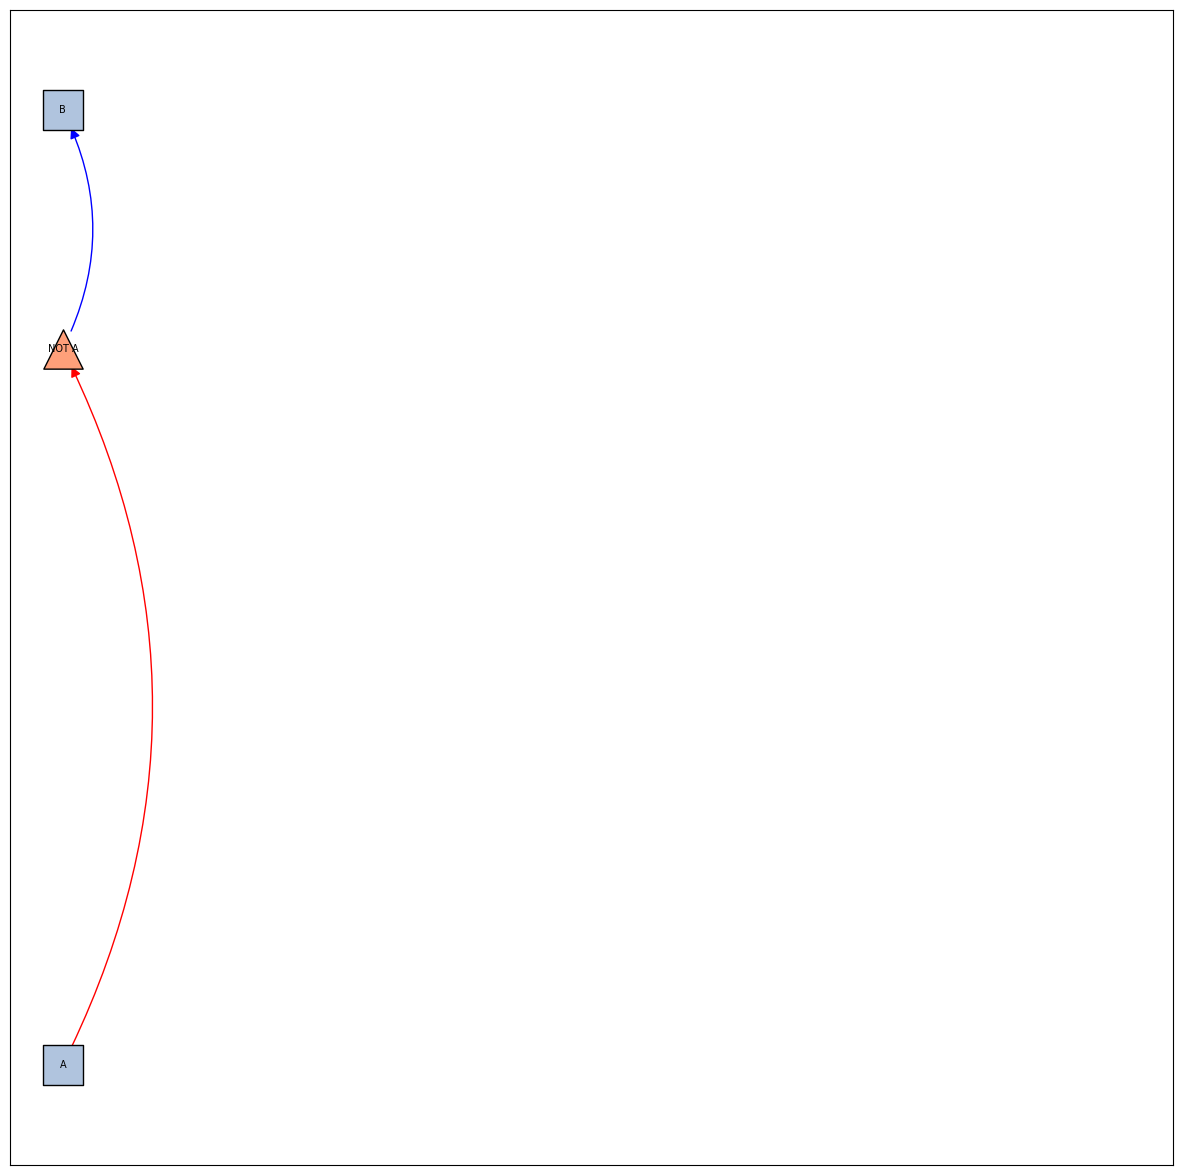

In [6]:
draw.draw_BioFuzzNet(G_not, general_edge_color_scheme, general_node_shape_scheme)

{'A': array([ 0., -2.]),
 'B': array([0.        , 1.42857143]),
 'not1': array([0.        , 0.57142857])}

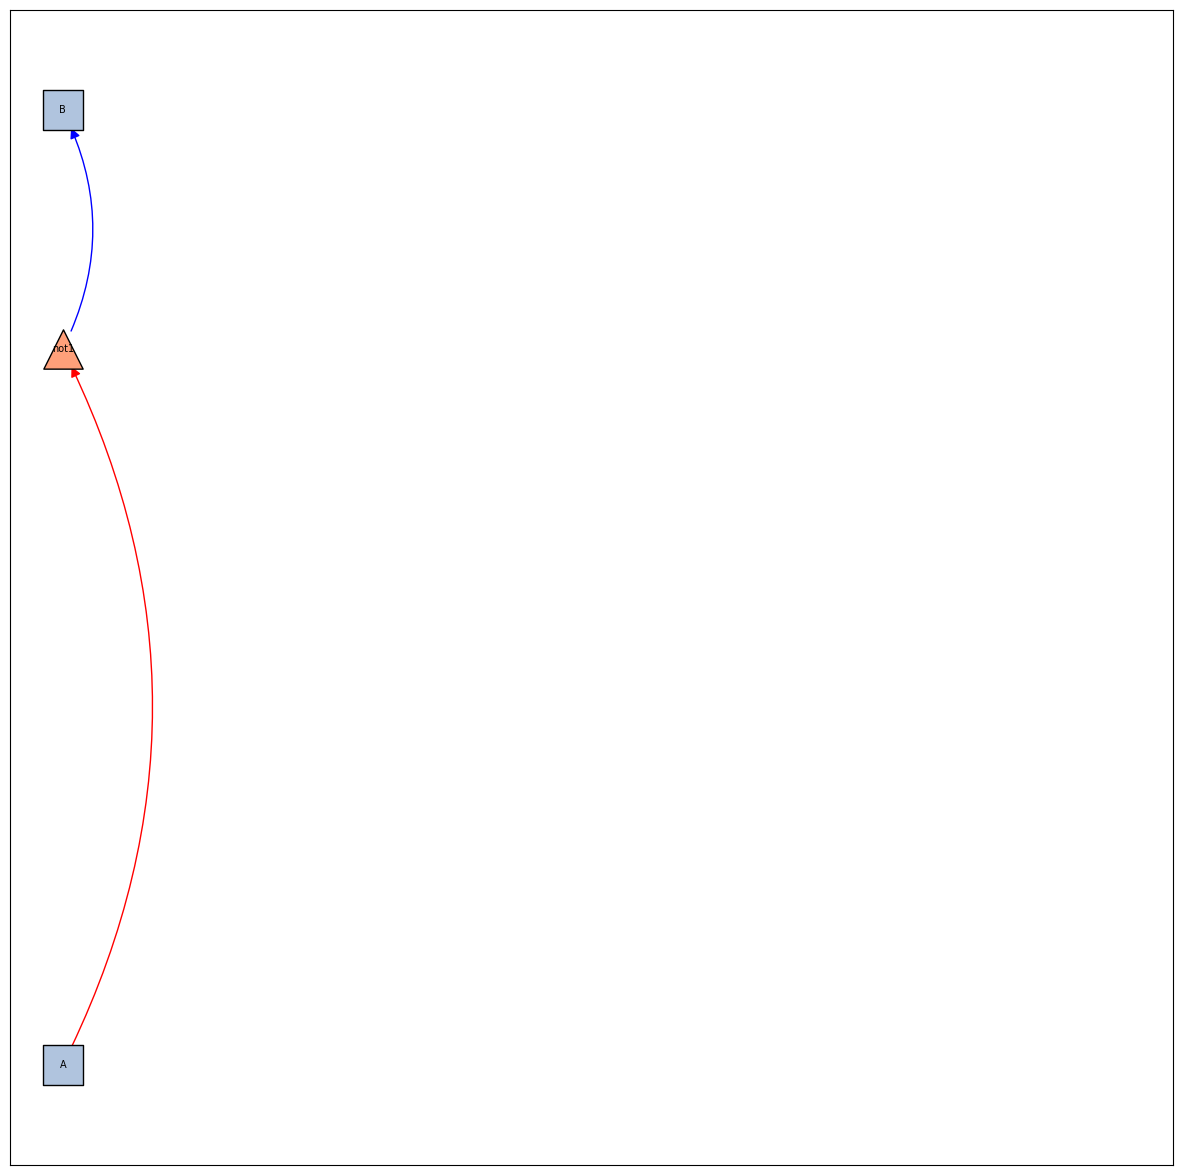

In [7]:
draw.draw_BioFuzzNet(
    G_not_from_list, general_edge_color_scheme, general_node_shape_scheme
)

In [8]:
# Create the BioFuzzNet from file
BFZ_from_file = biofuzznet.BioFuzzNet.build_BioFuzzNet_from_file(
    "biological_fuzzy_logic_networks/example_networks/Network_without_GRN.tsv"
)

In [9]:
# Create the BioMixNet from file
BMX = biomixnet.BioMixNet.build_BioMixNet_from_file(
    "biological_fuzzy_logic_networks/example_networks/Network_without_GRN.tsv"
)

{'CD45': array([-0.00881088, -0.9322599 ]),
 'IL15Ra': array([-0.00528653, -0.9322599 ]),
 'CTLA4': array([-0.00176218, -0.9322599 ]),
 'CD40': array([ 0.00176218, -0.9322599 ]),
 '41BB': array([ 0.00528653, -0.9322599 ]),
 'CD28': array([ 0.00881088, -0.9322599 ]),
 'GSK3b': array([-0.00176218,  0.19553237]),
 'PI3K': array([0.00176218, 0.19553237]),
 'JAK3': array([-0.00528653, -0.9040651 ]),
 'TRAF3': array([-0.00176218, -0.9040651 ]),
 'TRAF2': array([ 0.00176218, -0.9040651 ]),
 'Lck': array([ 0.00528653, -0.9040651 ]),
 'CD3z': array([-0.00176218, -0.73489626]),
 'Grb2': array([ 0.00176218, -0.73489626]),
 'JAK1': array([-0.01233523, -0.9252112 ]),
 'Shc': array([-0.00881088, -0.9252112 ]),
 'SHP1': array([-0.00528653, -0.9252112 ]),
 'SHP2': array([-0.00176218, -0.9252112 ]),
 'PP2A': array([ 0.00176218, -0.9252112 ]),
 'TRAF6': array([ 0.00528653, -0.9252112 ]),
 'TRAF1': array([ 0.00881088, -0.9252112 ]),
 'GADS': array([ 0.01233523, -0.9252112 ]),
 'MAPK': array([-0.00176218,

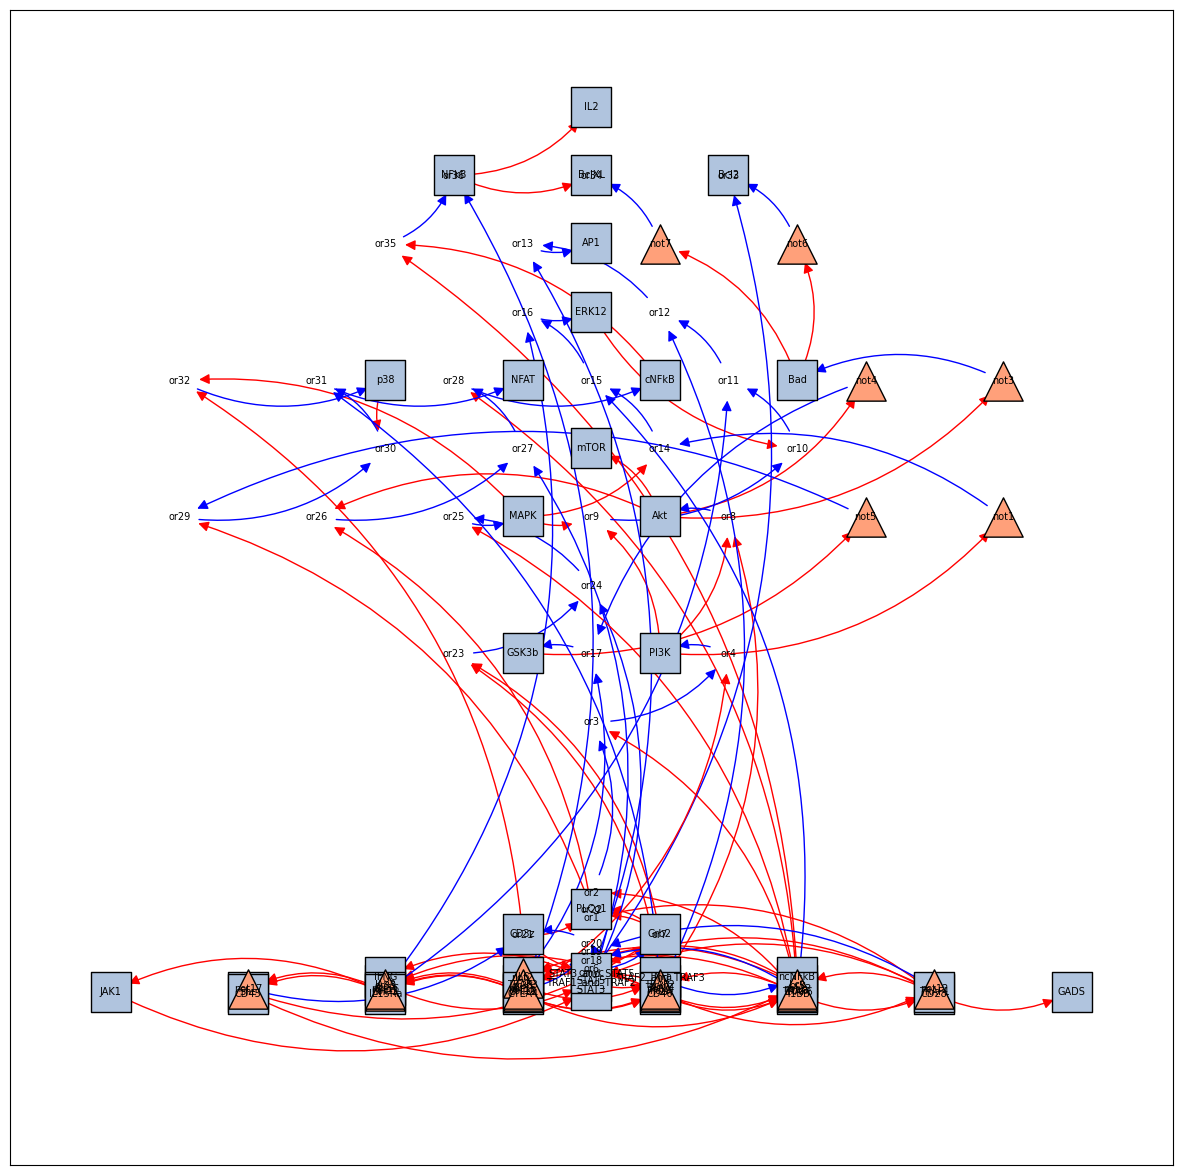

In [10]:
# You can also draw BioMixNet with the draw_BioFuzzNet function
# But this one is big so it won't look good
draw.draw_BioFuzzNet(BMX, general_edge_color_scheme, general_node_shape_scheme)

In [11]:
# This is what a biological node looks like
BFZ_from_file.nodes()["41BB"]

{'node_type': 'biological', 'output_state': None, 'ground_truth': None}

In [12]:
# This is what a logical node looks like
BFZ_from_file.nodes()["or1"]

{'node_type': 'logic_gate_OR', 'output_state': None}

In [13]:
# This is what a transfer edge looks like
BFZ_from_file.edges()[("CD28", "GADS")]

{'edge_type': 'transfer_function',
 'layer': HillTransferFunction(),
 'weight': 1}

In [14]:
# and its parameters are accessed via
hill = BFZ_from_file.edges()[("CD28", "GADS")]["layer"]
print(hill.n)
print(hill.K)

Parameter containing:
tensor([0.0050], requires_grad=True)
Parameter containing:
tensor([0.0729], requires_grad=True)


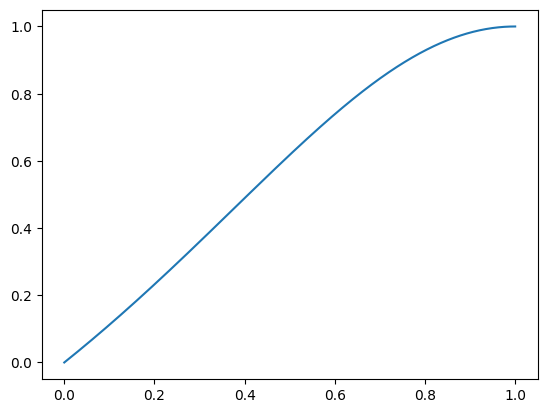

In [15]:
# And you can plot the function at this particular edge

utils.plot_edge_function(BFZ_from_file.edges()[("CD28", "GADS")])

# Simulating a BioFuzzNet

In [16]:
# Let's use the CAR domain signalling network
my_model = biofuzznet.BioFuzzNet.build_BioFuzzNet_from_file(
    "biological_fuzzy_logic_networks/example_networks/Network_without_GRN.tsv"
)

In [17]:
# It is initialised with random transfer function parameters
for edge in my_model.transfer_edges:
    # Each transfer edge has a layer
    layer = my_model.edges()[edge]["layer"]
    # Each layer has a n and an K parameter
    print(
        f"The edge {edge} has Hill parameters n = {1 + torch.exp(layer.n)} and K = {torch.exp(layer.K)}"
    )
    # Those parameters are torch.nn.Parameters and thus have a grad_fn which corresponds to their gradient

The edge ('CD28', 'GADS') has Hill parameters n = tensor([3.6013], grad_fn=<AddBackward0>) and K = tensor([0.8874], grad_fn=<ExpBackward0>)
The edge ('CD28', 'or1') has Hill parameters n = tensor([2.4057], grad_fn=<AddBackward0>) and K = tensor([0.6333], grad_fn=<ExpBackward0>)
The edge ('CD28', 'or5') has Hill parameters n = tensor([1.4274], grad_fn=<AddBackward0>) and K = tensor([0.3164], grad_fn=<ExpBackward0>)
The edge ('CD28', 'or6') has Hill parameters n = tensor([2.1814], grad_fn=<AddBackward0>) and K = tensor([0.7441], grad_fn=<ExpBackward0>)
The edge ('PI3K', 'not1') has Hill parameters n = tensor([1.5468], grad_fn=<AddBackward0>) and K = tensor([1.4021], grad_fn=<ExpBackward0>)
The edge ('PI3K', 'or8') has Hill parameters n = tensor([1.0688], grad_fn=<AddBackward0>) and K = tensor([2.7070], grad_fn=<ExpBackward0>)
The edge ('PI3K', 'or9') has Hill parameters n = tensor([1.0333], grad_fn=<AddBackward0>) and K = tensor([0.6389], grad_fn=<ExpBackward0>)
The edge ('Lck', 'not2') 

In [18]:
# What are its root nodes?
my_model.root_nodes

['CD28', '41BB', 'CD40', 'CTLA4', 'IL15Ra', 'CD45']

In [19]:
# Currently the network has None values at the output state and ground truth tensors
print(
    f"The current output state at node 41BB is {my_model.nodes()['41BB']['output_state']} and the current ground truth is {my_model.nodes()['41BB']['ground_truth']}"
)

The current output state at node 41BB is None and the current ground truth is None


In [20]:
# We can give both of those fields a random value
my_model.initialise_random_truth_and_output(3000)
print(
    f"The current output state at node 41BB is {my_model.nodes()['41BB']['output_state']} and the current ground truth is {my_model.nodes()['41BB']['ground_truth']}"
)

The current output state at node 41BB is tensor([0.2102, 0.6449, 0.0293,  ..., 0.8458, 0.3625, 0.6541]) and the current ground truth is tensor([0.7739, 0.4373, 0.4319,  ..., 0.4872, 0.6610, 0.0604])


In [21]:
# That works!
# But what if we want to specify a given value as the ground truth?
# Let's say that we know the value at the root nodes

tensor_list = [torch.ones(3000) for i in range(6)]
ground_truth = {
    my_model.root_nodes[i]: tensor_list[i] for i in range(len(my_model.root_nodes))
}

# We can set the ground truth at the root nodes
my_model.set_network_ground_truth(ground_truth)
print(
    f"The current output state at node 41BB is {my_model.nodes()['41BB']['output_state']} and the current ground truth is {my_model.nodes()['41BB']['ground_truth']}"
)

# But careful! The nodes that are not in ground_truth are not modified
# (If the warnings were not enough to warn you)
# (I do know they get pretty annoying, you can disable them during optimisation ...
# ... but I suggest keeping them when you're setting up your network so you are aware of possible misbehaviors)
print(
    f"The current output state at node ERK12 is {my_model.nodes()['ERK12']['output_state']} and the current ground truth is {my_model.nodes()['ERK12']['ground_truth']}"
)

The current output state at node 41BB is tensor([1., 1., 1.,  ..., 1., 1., 1.]) and the current ground truth is tensor([1., 1., 1.,  ..., 1., 1., 1.])
The current output state at node ERK12 is tensor([0.1154, 0.8781, 0.7608,  ..., 0.3120, 0.5101, 0.1952]) and the current ground truth is tensor([0.8676, 0.6409, 0.3770,  ..., 0.6286, 0.6878, 0.5234])


In [22]:
# Let's now simulate our model
# For that you need to tell it what nodes you give as input
# Here it's easy, there's no cycle, it's just the root nodes

my_model.sequential_update(my_model.root_nodes)

In [23]:
# Let's see those results
print(
    f"The current output state at node ERK12 is {my_model.nodes()['ERK12']['output_state']} and the current ground truth is {my_model.nodes()['ERK12']['ground_truth']}"
)

The current output state at node ERK12 is tensor([1., 1., 1.,  ..., 1., 1., 1.], grad_fn=<IndexPutBackward0>) and the current ground truth is tensor([0.8676, 0.6409, 0.3770,  ..., 0.6286, 0.6878, 0.5234])


In [24]:
# The simulation did work well: the output state tensor has only one value,
#  which makes sense since all 3000 cells had the same value 1 at all inputs
# Notice that the ground truth hasn't changed
# Which is reassuring, we don't want our measuremets to change when the model is simulated
# Now let's try to optimise, shall we?

# Optimisation of a BioFuzzNet

In [25]:
# For a measurement, we need input values and ground truth values (ie the values we're trying to fit)
# for a training set and a validation set.
# We'll simulate a dataset that is a bit more complex
tensor_list = [torch.ones(3000) for i in range(6)]
# Select some indices to set to 0
indices = np.random.randint(low=0, high=3000, size=1500)
for c in indices:
    for i in range(6):
        tensor_list[i][c] = 0
ground_truth = {
    my_model.root_nodes[i]: tensor_list[i] for i in range(len(my_model.root_nodes))
}

# We can set the ground truth at the root nodes
my_model.set_network_ground_truth(ground_truth)
print(
    f"The current output state at node 41BB is {my_model.nodes()['41BB']['output_state']} and the current ground truth is {my_model.nodes()['41BB']['ground_truth']}"
)

# But careful! The nodes that are not in ground_truth are not modified
# (If the warnings were not enough to warn you)
# (I do know they get pretty annoying, you can disable them during optimisation ...
# ... but I suggest keeping them when you're setting up your network so you are aware of possible misbehaviors)
print(
    f"The current output state at node ERK12 is {my_model.nodes()['ERK12']['output_state']} and the current ground truth is {my_model.nodes()['ERK12']['ground_truth']}"
)

# Then we simulate again
my_model.sequential_update(my_model.root_nodes)

# Let's define the ground truth: it's the result of the previous simulation, so it's already in the output states
ground_truth_to_find = my_model.output_states

# Let's define the inputs and ground_truth for the training and validation set
ground_truth_train = {
    node: ground_truth_to_find[node][0:2000] for node in ground_truth_to_find.keys()
}
ground_truth_test = {
    node: ground_truth_to_find[node][2000:3000] for node in ground_truth_to_find.keys()
}

# The input is just the ground truth values at the root nodes
input_train = {node: ground_truth_train[node] for node in my_model.root_nodes}
input_test = {node: ground_truth_test[node] for node in my_model.root_nodes}

The current output state at node 41BB is tensor([1., 1., 0.,  ..., 1., 0., 0.]) and the current ground truth is tensor([1., 1., 0.,  ..., 1., 0., 0.])
The current output state at node ERK12 is tensor([1., 1., 1.,  ..., 1., 1., 1.], grad_fn=<IndexPutBackward0>) and the current ground truth is tensor([0.8676, 0.6409, 0.3770,  ..., 0.6286, 0.6878, 0.5234])


In [26]:
# Then we create a model to optimise: same topology, but different parameters at the transfer function
model_to_fit = biofuzznet.BioFuzzNet.build_BioFuzzNet_from_file(
    "biological_fuzzy_logic_networks/example_networks/Network_without_GRN.tsv"
)

In [27]:
# Now we just need to specify some optimisation parameters

learning_rate = 5e-3
epochs = 2  # That seems like a lot, but 1 epoch is basically one simulation of the network on all datapoints, so we need a lot of them
batch_size = 300

In [28]:
# Now let's optimise

loss = model_to_fit.conduct_optimisation(
    input=input_train,
    ground_truth=ground_truth_train,
    test_input=input_test,
    test_ground_truth=ground_truth_test,
    epochs=epochs,
    learning_rate=learning_rate,
    batch_size=batch_size,
)

100%|██████████| 2/2 [05:33<00:00, 166.56s/it]


In [29]:
# You get the loss as the output of the optimisation
loss

,time,loss,phase
0,2023-11-02 15:36:55.479542,0.0,train
1,2023-11-02 15:37:21.311825,0.0,train
2,2023-11-02 15:37:46.378353,0.0,train
3,2023-11-02 15:38:11.727781,0.0,train
4,2023-11-02 15:38:36.518738,0.0,train
5,2023-11-02 15:39:01.659176,0.0,train
6,2023-11-02 15:39:19.311929,0.0,train
7,2023-11-02 15:39:19.625781,0.0,test
8,2023-11-02 15:39:44.378663,0.0,train
9,2023-11-02 15:40:09.774973,0.0,train


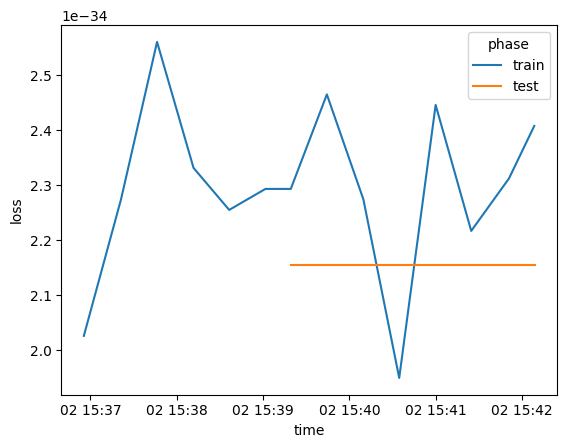

In [30]:
# You can plot it to check that it converges
# It probably won't because we did very few epochs
sns.lineplot(data=loss, x="time", y="loss", hue="phase")
plt.show()

# Here since we used 0 and 1 as input the Hill functions do not matter so much and we are already so close to the truth that there is not much to see

In [31]:
# Let's try with a more interesting input
# For a measurement, we need input values and ground truth values (ie the values we're trying to fit)
# for a training set and a validation set.
# We'll simulate a dataset that is a bit more complex
tensor_list = [torch.Tensor(np.random.rand(3000))] * 6
ground_truth = {
    my_model.root_nodes[i]: tensor_list[i] for i in range(len(my_model.root_nodes))
}

# We can set the ground truth at the root nodes
my_model.set_network_ground_truth(ground_truth)
print(
    f"The current output state at node 41BB is {my_model.nodes()['41BB']['output_state']} and the current ground truth is {my_model.nodes()['41BB']['ground_truth']}"
)

# But careful! The nodes that are not in ground_truth are not modified
# (If the warnings were not enough to warn you)
# (I do know they get pretty annoying, you can disable them during optimisation ...
# ... but I suggest keeping them when you're setting up your network so you are aware of possible misbehaviors)
print(
    f"The current output state at node ERK12 is {my_model.nodes()['ERK12']['output_state']} and the current ground truth is {my_model.nodes()['ERK12']['ground_truth']}"
)

# Then we simulate again
my_model.sequential_update(my_model.root_nodes)

# Let's define the ground truth: it's the result of the previous simulation, so it's already in the output states
ground_truth_to_find = my_model.output_states

# Let's define the inputs and ground_truth for the training and validation set
ground_truth_train = {
    node: ground_truth_to_find[node][0:2000] for node in ground_truth_to_find.keys()
}
ground_truth_test = {
    node: ground_truth_to_find[node][2000:3000] for node in ground_truth_to_find.keys()
}

# The input is just the ground truth values at the root nodes
input_train = {node: ground_truth_train[node] for node in my_model.root_nodes}
input_test = {node: ground_truth_test[node] for node in my_model.root_nodes}

# Let's get more epochs to actually fit
epochs = 15
batch_size = 300

The current output state at node 41BB is tensor([0.2577, 0.6366, 0.5163,  ..., 0.6653, 0.3529, 0.4909]) and the current ground truth is tensor([0.2577, 0.6366, 0.5163,  ..., 0.6653, 0.3529, 0.4909])
The current output state at node ERK12 is tensor([1., 1., 1.,  ..., 1., 1., 1.], grad_fn=<IndexPutBackward0>) and the current ground truth is tensor([0.8676, 0.6409, 0.3770,  ..., 0.6286, 0.6878, 0.5234])


# Optimization is here

In [32]:
loss = model_to_fit.conduct_optimisation(
    input=input_train,
    ground_truth=ground_truth_train,
    test_input=input_test,
    test_ground_truth=ground_truth_test,
    epochs=epochs,
    learning_rate=learning_rate,
    batch_size=batch_size,
)

  0%|          | 0/15 [00:00<?, ?it/s]

100%|██████████| 15/15 [26:04<00:00, 104.33s/it]


In [33]:
for e in model_to_fit.transfer_edges:
    layer = model_to_fit.edges()[e]["layer"]
    # Each layer has a n and an K parameter
    print(f"The edge {e} has parameter\n n = {layer.n} and \n K = {layer.K}")

The edge ('CD28', 'GADS') has parameter
 n = Parameter containing:
tensor([0.8688], requires_grad=True) and 
 K = Parameter containing:
tensor([-0.2807], requires_grad=True)
The edge ('CD28', 'or1') has parameter
 n = Parameter containing:
tensor([0.7145], requires_grad=True) and 
 K = Parameter containing:
tensor([-0.3492], requires_grad=True)
The edge ('CD28', 'or5') has parameter
 n = Parameter containing:
tensor([-0.1658], requires_grad=True) and 
 K = Parameter containing:
tensor([-0.1557], requires_grad=True)
The edge ('CD28', 'or6') has parameter
 n = Parameter containing:
tensor([0.6291], requires_grad=True) and 
 K = Parameter containing:
tensor([-0.7337], requires_grad=True)
The edge ('PI3K', 'not1') has parameter
 n = Parameter containing:
tensor([0.4209], requires_grad=True) and 
 K = Parameter containing:
tensor([-1.1378], requires_grad=True)
The edge ('PI3K', 'or8') has parameter
 n = Parameter containing:
tensor([-0.3701], requires_grad=True) and 
 K = Parameter containi

In [34]:
# You get the loss as the output of the optimisation
loss

,time,loss,phase
0,2023-11-02 15:42:39.129115,0.017638,train
1,2023-11-02 15:43:04.605436,0.016875,train
2,2023-11-02 15:43:29.486202,0.016755,train
3,2023-11-02 15:43:55.153941,0.016816,train
4,2023-11-02 15:44:20.543563,0.017035,train
...,...,...,...
115,2023-11-02 16:07:41.321018,0.005181,train
116,2023-11-02 16:07:55.597931,0.005535,train
117,2023-11-02 16:08:06.199336,0.004844,train
118,2023-11-02 16:08:18.307672,0.004926,train


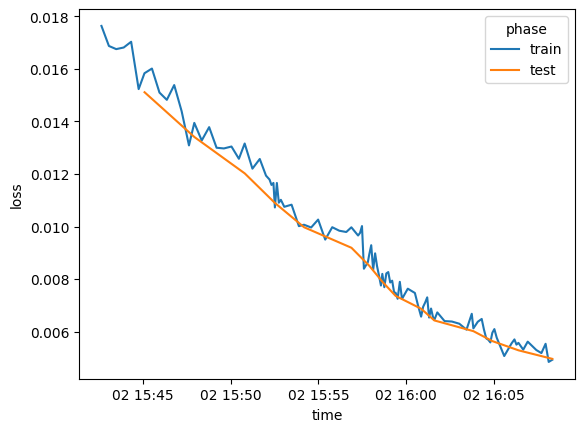

In [35]:
# You can plot it to check that it converges
# It probably won't because we did very few epochs
sns.lineplot(data=loss, x="time", y="loss", hue="phase")
plt.show()

In [36]:
# If you do enough epochs the loss should converge and you should have a model that fits your data
# To simulate using this model, you just need to go through the simulation part of the model
# Keep the parameters that you obtained after optimisation
# Feed in the inputs, and simulate!
# I suggest you try it by yourself on a simpler model that you can run for several 100 of epochs in an acceptable time

# What about BioMixNets?

In [37]:
# It's exactly the same process
# Except you have an additinal type of gates; the MIXED gate
# That has a parameter determining if it's an AND gate, an OR gate, or a mix of the 2 (not good if that happens after optimisation)

BMN = biomixnet.BioMixNet.build_BioMixNet_from_file(
    "biological_fuzzy_logic_networks/example_networks/manual_network_reduced.tsv"
)
# Careful; they're called or, but they're actually mixed
BMN.mixed_gates
print([BMN.nodes()[m] for m in BMN.mixed_gates])

[{'node_type': 'logic_gate_MIXED', 'output_state': None, 'gate': MixedGate()}, {'node_type': 'logic_gate_MIXED', 'output_state': None, 'gate': MixedGate()}, {'node_type': 'logic_gate_MIXED', 'output_state': None, 'gate': MixedGate()}, {'node_type': 'logic_gate_MIXED', 'output_state': None, 'gate': MixedGate()}, {'node_type': 'logic_gate_MIXED', 'output_state': None, 'gate': MixedGate()}, {'node_type': 'logic_gate_MIXED', 'output_state': None, 'gate': MixedGate()}, {'node_type': 'logic_gate_MIXED', 'output_state': None, 'gate': MixedGate()}, {'node_type': 'logic_gate_MIXED', 'output_state': None, 'gate': MixedGate()}, {'node_type': 'logic_gate_MIXED', 'output_state': None, 'gate': MixedGate()}]


In [38]:
# And this is how you access the gate parameter
print(
    f"This is the value of the AND parameter at gate or1: {torch.sigmoid(BMN.nodes()['or1']['gate'].AND_param)}. Do not forget that it needs to go through a sigmoid."
)

This is the value of the AND parameter at gate or1: 0.5. Do not forget that it needs to go through a sigmoid.


In [39]:
# If the gate parameter is close to 1, then the predicted gate is an AND gate
# If the gate parameter is close to 0, then the predicted gate is an OR gate
# Else: then we have a problem
# Here it's 0.5 because we have not optimised the network yet

# THE END

I think that's it. Good luck with the BioFuzzNet module!